In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense




In [ ]:

# Load and clean data
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:

# Download NLTK stopwords (default path used)
nltk.download('stopwords')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Text preprocessing function
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_message'] = df['message'].apply(clean_text)


In [ ]:

# TF-IDF vectorization with N-grams
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X = tfidf.fit_transform(df['cleaned_message'])
y = df['label']


In [ ]:

# Train/test split for traditional ML models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)
nb_auc = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])



In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])


In [ ]:

# Support Vector Machine
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])



In [ ]:
# Tokenization and padding for LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_message'])
sequences = tokenizer.texts_to_sequences(df['cleaned_message'])
X_padded = pad_sequences(sequences, maxlen=100)


In [ ]:

# Train/test split for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [ ]:
# LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_lstm, y_train_lstm, epochs=16, batch_size=64, validation_split=0.1)
lstm_acc = model.evaluate(X_test_lstm, y_test_lstm)[1]
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype(int)

# AUC Calculation using predicted probabilities
lstm_auc = roc_auc_score(y_test_lstm, model.predict(X_test_lstm))  # This will give the probabilities

# Display the results
print(f"\nLSTM Accuracy: {lstm_acc:.4f}, Precision: {lstm_precision:.4f}, Recall: {lstm_recall:.4f}, F1-score: {lstm_f1:.4f}, AUC: {lstm_auc:.4f}")




Epoch 1/16


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 365ms/step - accuracy: 0.8879 - loss: 0.3464 - val_accuracy: 0.9596 - val_loss: 0.1363
Epoch 2/16
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 207ms/step - accuracy: 0.9840 - loss: 0.0562 - val_accuracy: 0.9709 - val_loss: 0.1000
Epoch 3/16
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - accuracy: 0.9960 - loss: 0.0171 - val_accuracy: 0.9798 - val_loss: 0.0958
Epoch 4/16
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.9979 - loss: 0.0116 - val_accuracy: 0.9753 - val_loss: 0.1065
Epoch 5/16
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 207ms/step - accuracy: 0.9984 - loss: 0.0049 - val_accuracy: 0.9731 - val_loss: 0.1421
Epoch 6/16
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - accuracy: 0.9979 - loss: 0.0078 - val_accuracy: 0.9753 - val_loss: 0.1330
Epoch 7/16
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 224ms/step - accuracy: 0.9981 - loss: 0.0068 - val_accuracy: 0.9709 - val_loss: 0.1228
Epoch 8/16
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 200ms/step - accuracy: 0.9989 - loss: 0.0027 - val_accuracy: 0.968

In [ ]:
# Display the results
print(f"\nNaive Bayes Accuracy: {nb_acc:.4f}, Precision: {nb_precision:.4f}, Recall: {nb_recall:.4f}, F1-score: {nb_f1:.4f}, AUC: {nb_auc:.4f}")
print(f"Logistic Regression Accuracy: {lr_acc:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1-score: {lr_f1:.4f}, AUC: {lr_auc:.4f}")
print(f"SVM Accuracy: {svm_acc:.4f}, Precision: {svm_precision:.4f}, Recall: {svm_recall:.4f}, F1-score: {svm_f1:.4f}, AUC: {svm_auc:.4f}")
print(f"LSTM Accuracy: {lstm_acc:.4f}, Precision: {lstm_precision:.4f}, Recall: {lstm_recall:.4f}, F1-score: {lstm_f1:.4f}, AUC: {lstm_auc:.4f}")



Naive Bayes Accuracy: 0.9740, Precision: 1.0000, Recall: 0.8067, F1-score: 0.8930, AUC: 0.9832
Logistic Regression Accuracy: 0.9570, Precision: 0.9722, Recall: 0.7000, F1-score: 0.8140, AUC: 0.9893
SVM Accuracy: 0.9821, Precision: 0.9851, Recall: 0.8800, F1-score: 0.9296, AUC: 0.9914
LSTM Accuracy: 0.9821, Precision: 0.9565, Recall: 0.8800, F1-score: 0.9167, AUC: 0.9909


In [ ]:

# Classification Report for each model
print("\nNaive Bayes:\n", classification_report(y_test, y_pred_nb))
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("SVM:\n", classification_report(y_test, y_pred_svm))
print("LSTM:\n", classification_report(y_test_lstm, y_pred_lstm))



Naive Bayes:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.70      0.81       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.89      1115
weighted avg       0.96      0.96      0.95      1115

SVM:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.88      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.


Naive Bayes Confusion Matrix:
 [[965   0]
 [ 29 121]]
Logistic Regression Confusion Matrix:
 [[962   3]
 [ 45 105]]
SVM Confusion Matrix:
 [[963   2]
 [ 18 132]]
LSTM Confusion Matrix:
 [[960   5]
 [ 15 135]]


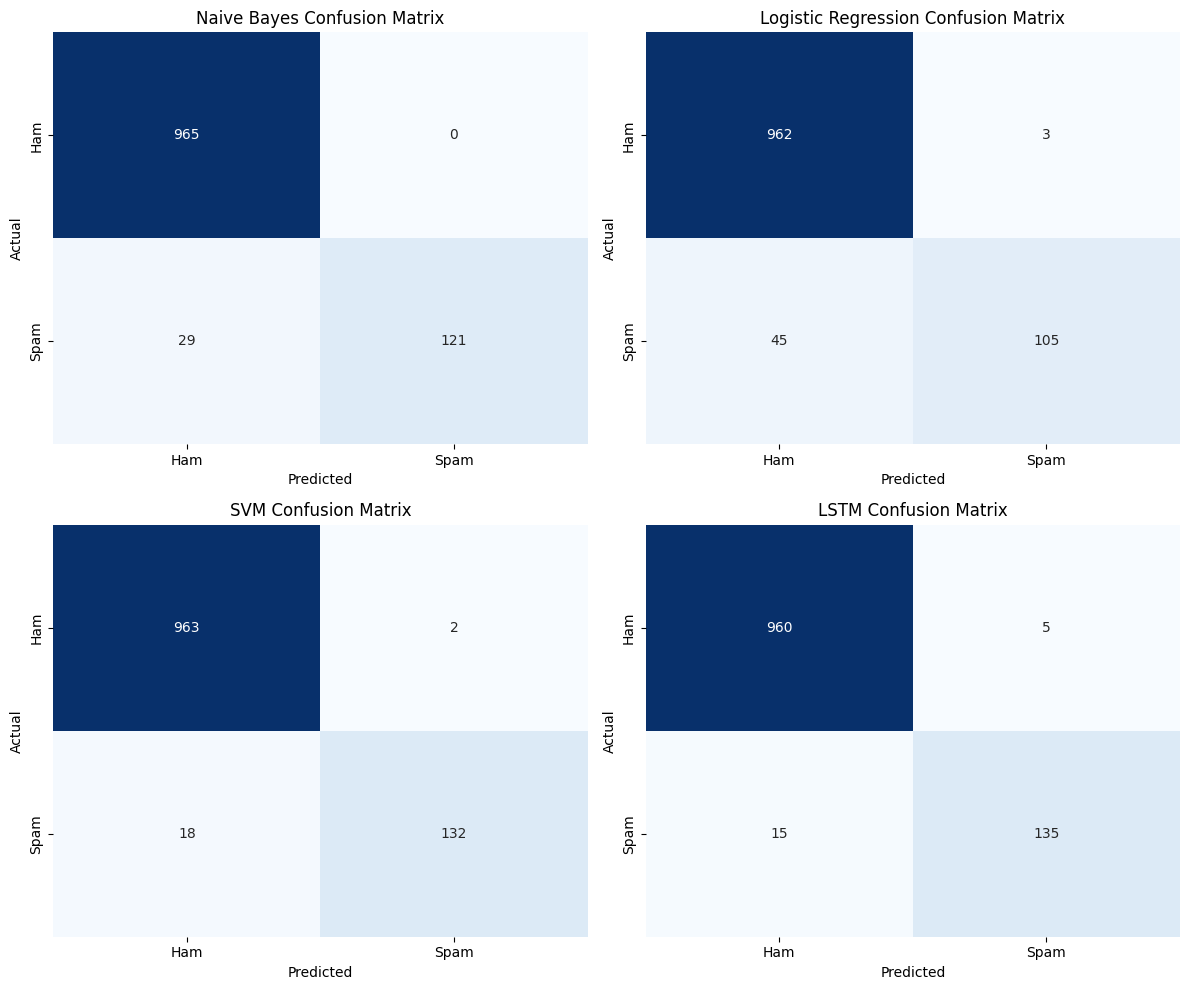

In [20]:

# Confusion Matrix for each model
print("\nNaive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("LSTM Confusion Matrix:\n", confusion_matrix(y_test_lstm, y_pred_lstm))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define model names and predictions
models = {
    "Naive Bayes": (y_test, y_pred_nb),
    "Logistic Regression": (y_test, y_pred_lr),
    "SVM": (y_test, y_pred_svm),
    "LSTM": (y_test_lstm, y_pred_lstm)
}

# Plot confusion matrices
plt.figure(figsize=(12, 10))

for i, (model_name, (true_labels, pred_labels)) in enumerate(models.items(), 1):
    cm = confusion_matrix(true_labels, pred_labels)
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()



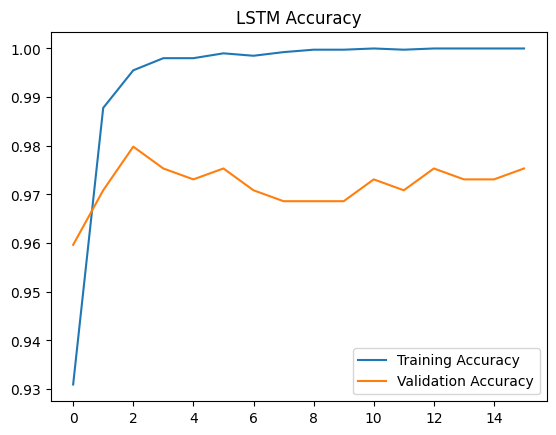

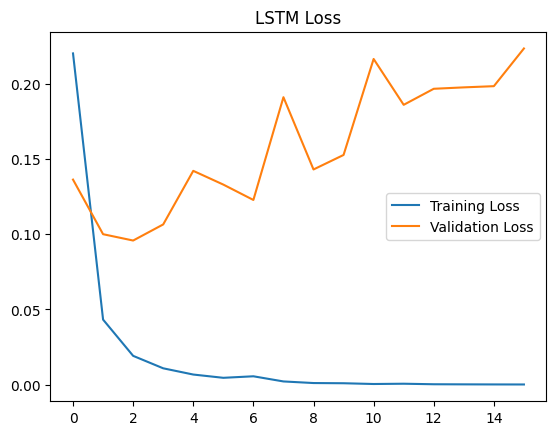

In [ ]:

# Plotting loss and accuracy for LSTM (if needed)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss')
plt.legend()
plt.show()
